In [33]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [69]:
data = pd.read_csv('data/small_data.csv')

In [70]:
X = data.drop(data.columns.values[:9], axis=1).drop('visibility', axis=1)

In [51]:
def norm(row):
    tot_reactions = row.sum()
    row = row.apply(lambda x: x/tot_reactions)
    return row

In [72]:
X = X.drop(['shares', 'total_like'], axis=1).apply(norm, axis=0)

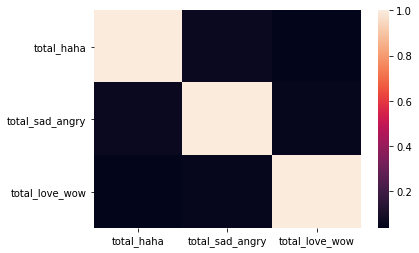

In [73]:
sns.heatmap(X.corr())

In [71]:
X['total_sad_angry'] = X['total_sad'] + X['total_angry']
X['total_love_wow']  = X['total_love'] + X['total_wow']

X = X.drop(['total_sad', 'total_angry', 'total_love', 'total_wow'], axis=1)
# X = X.drop(['total_sad', 'total_angry', 'total_love', 'total_wow', 'shares', 'total_like'], axis=1)

In [81]:
kmeans = KMeans(n_clusters=8).fit(X)

In [82]:
pd.Series(kmeans.labels_).value_counts()

0    867
6     13
5     10
7      1
4      1
3      1
2      1
1      1
dtype: int64

In [ ]:
res = pd.Series(kmeans.labels_)